# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from IPython.display import Markdown
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from mlxtend.evaluate import bias_variance_decomp
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import GridSearchCV
from featurewiz import featurewiz
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

Imported version = 0.1.87.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


# Define Function

In [2]:
def remove_outliers(df,variables):
    q1 = percentile25 = df[variables].quantile(0.25)
    q3 = percentile75 = df[variables].quantile(0.75)
    iqr = q3-q1
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[df[variables] > upper_limit]
    df[df[variables] < lower_limit]
    new_data = df[df[variables] < upper_limit]
    df[variables] = np.where(
        df[variables] > upper_limit,
        upper_limit,
        np.where(
        df[variables] < lower_limit,
        lower_limit,
        df[variables]
        )
    )
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[variables])
    plt.subplot(2,2,2)
    sns.boxplot(df[variables])

In [3]:
def accuracy_report(x,y):
    print(accuracy_score(x, y))
    print(classification_report(x, y))
    print(roc_auc_score(x, y))


In [4]:
def plot_confusion_matrix(x,y):
    clf = confusion_matrix(x,y)
    ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Analysis Data

In [5]:
dataset = pd.read_csv("heart_disease.csv")

In [6]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [7]:
dataset.shape

(319795, 18)

In [8]:
dataset.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [9]:
print(dataset.nunique())

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


In [10]:
for col_name in dataset.columns:
    print(dataset[col_name].unique())

['No' 'Yes']
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
[ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
[30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27 26 11 19]
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
[ 5  7  8  6 12  4  9 10 15  3  2  1 16 18 14 20 11 13 17 24 19 21 22 23]
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


## Missing value analysis

In [11]:
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

There is no null value so that we can proceed to next step

# Exploratory Data Analysis

## Distribution

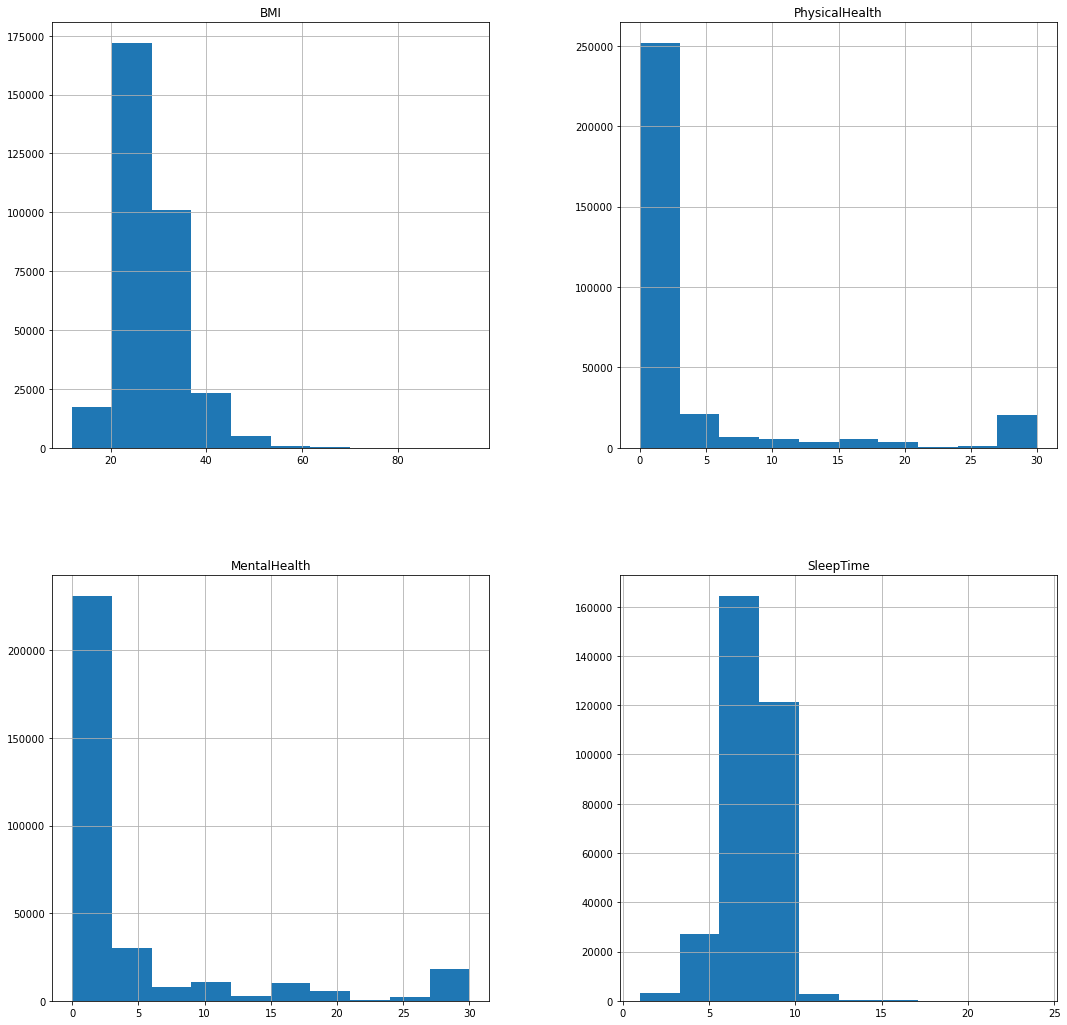

In [12]:
dataset.hist(figsize = (18,18))
plt.show()

                     HeartDisease
Sex    HeartDisease              
Female No                0.933053
       Yes               0.066947
Male   No                0.893815
       Yes               0.106185


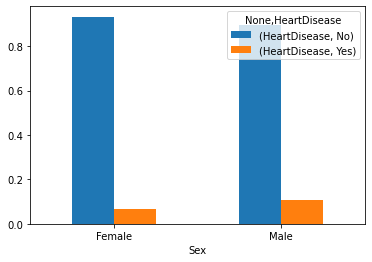

In [13]:
plot2=pd.DataFrame(dataset.groupby('Sex')['HeartDisease'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

HeartDisease : 0 No Heart disease, 1 Heart disease
Based on the graph above, we can see that Male has the highest number of no heart disease, whereas female is the highest number that has heart disease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

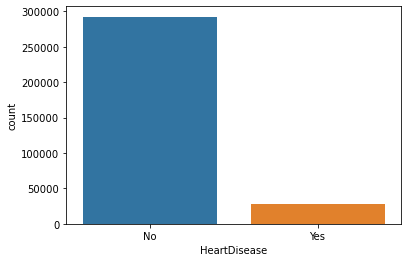

In [14]:
# visualize the HeartDisease variable
sns.countplot(x='HeartDisease',data=dataset)

From this count plot, it can be seen that there were a lot of people who not suffer heart disease. The data is imbalance because the ratio is 1:12.

## Correlation

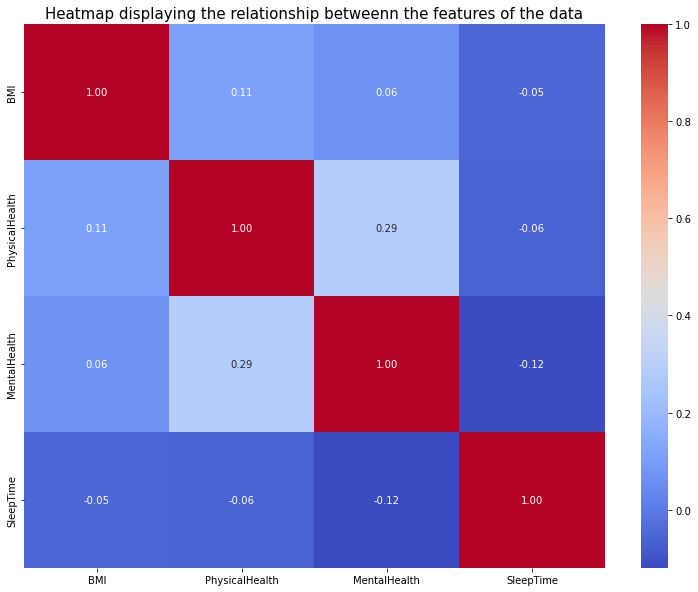

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Heatmap displaying the relationship betweenn the features of the data',
fontsize=15)
plt.show()

## Outliers

<AxesSubplot:xlabel='BMI'>

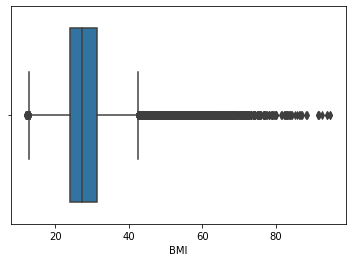

In [16]:
sns.boxplot(x=dataset['BMI'])

<AxesSubplot:xlabel='PhysicalHealth'>

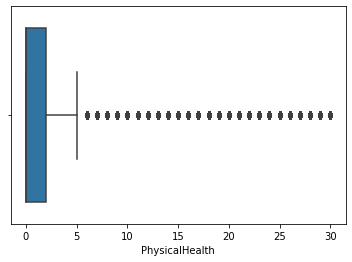

In [17]:
sns.boxplot(x=dataset['PhysicalHealth'])

<AxesSubplot:xlabel='MentalHealth'>

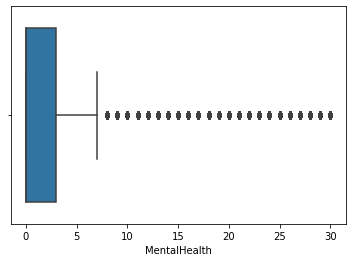

In [18]:
sns.boxplot(x=dataset['MentalHealth'])

<AxesSubplot:xlabel='SleepTime'>

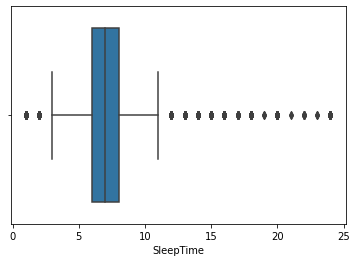

In [19]:
sns.boxplot(x=dataset['SleepTime'])

### Remove outliers

#### BMI

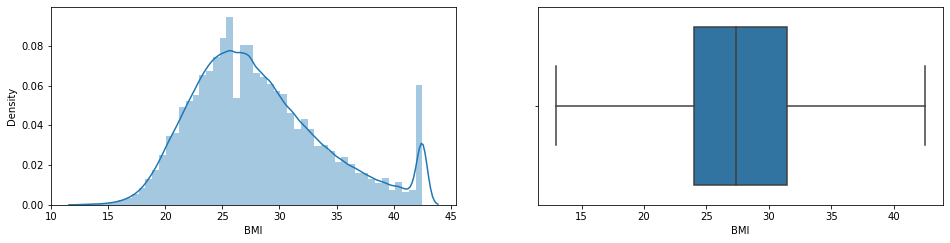

In [20]:
remove_outliers(dataset,'BMI')

#### PhysicalHealth

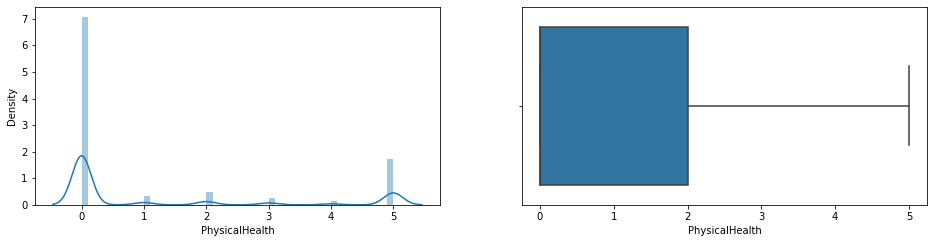

In [21]:
remove_outliers(dataset,'PhysicalHealth')

#### MentalHealth

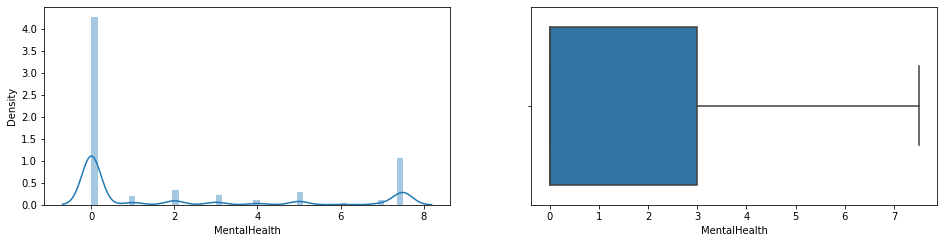

In [22]:
remove_outliers(dataset,'MentalHealth')

#### SleepTime

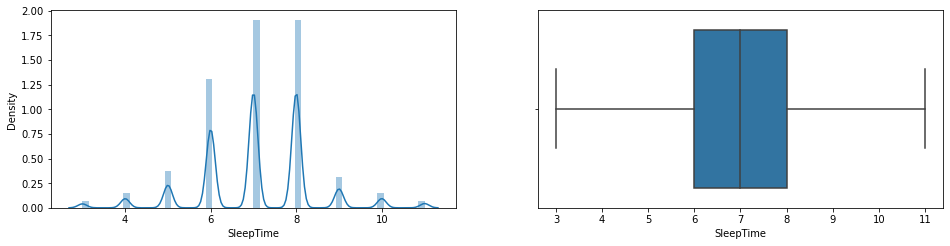

In [23]:
remove_outliers(dataset,'SleepTime')

## Encode data

In [24]:
label_encoder = preprocessing.LabelEncoder()
for col in dataset:
    if dataset[col].dtype.name != 'object':
        continue
    dataset[col]= label_encoder.fit_transform(dataset[col])

In [25]:
for col_name in dataset.columns:
    print(dataset[col_name].unique())

[0 1]
[16.6  20.34 26.58 ... 41.23 15.57 40.7 ]
[1 0]
[0 1]
[0 1]
[3. 0. 5. 1. 2. 4.]
[7.5 0.  2.  5.  4.  3.  1.  7.  6. ]
[0 1]
[0 1]
[ 7 12  9 11  4 10  8  6  5  0  3  2  1]
[5 2 1 0 4 3]
[2 0 1 3]
[1 0]
[4 1 2 3 0]
[ 5.  7.  8.  6. 11.  4.  9. 10.  3.]
[1 0]
[0 1]
[1 0]


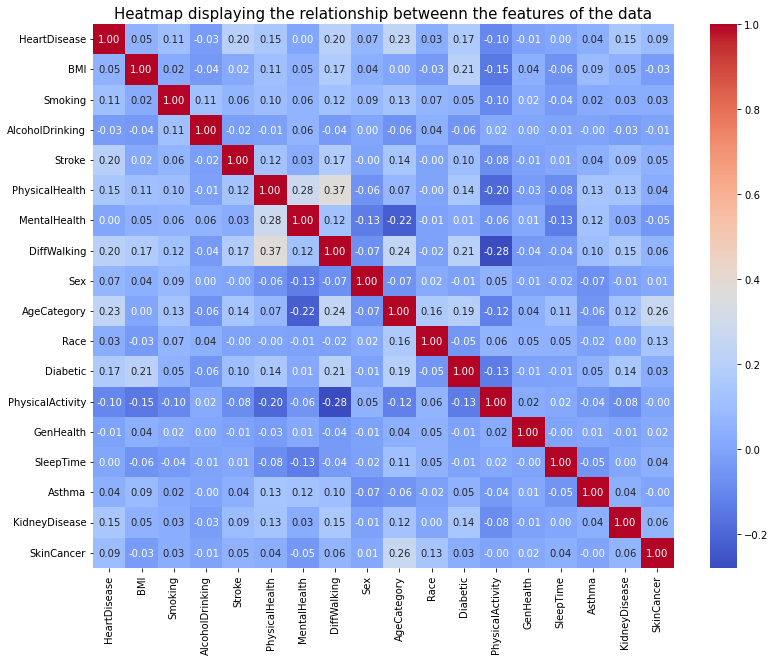

In [26]:
plt.figure(figsize=(13,10))
sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Heatmap displaying the relationship betweenn the features of the data',
fontsize=15)
plt.show()

In [27]:
dataset = dataset.sample(frac=0.01)
dataset.shape

(3198, 18)

In [28]:
#split data into feature and HeartDisease
X_data = dataset.drop(['HeartDisease'],axis=1)
 
y_data = dataset.HeartDisease.values

# Data Preprocessing

## Feature Selection

### Featurewiz

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (3198, 18)
    Loaded train data. Shape = (3198, 18)
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data 

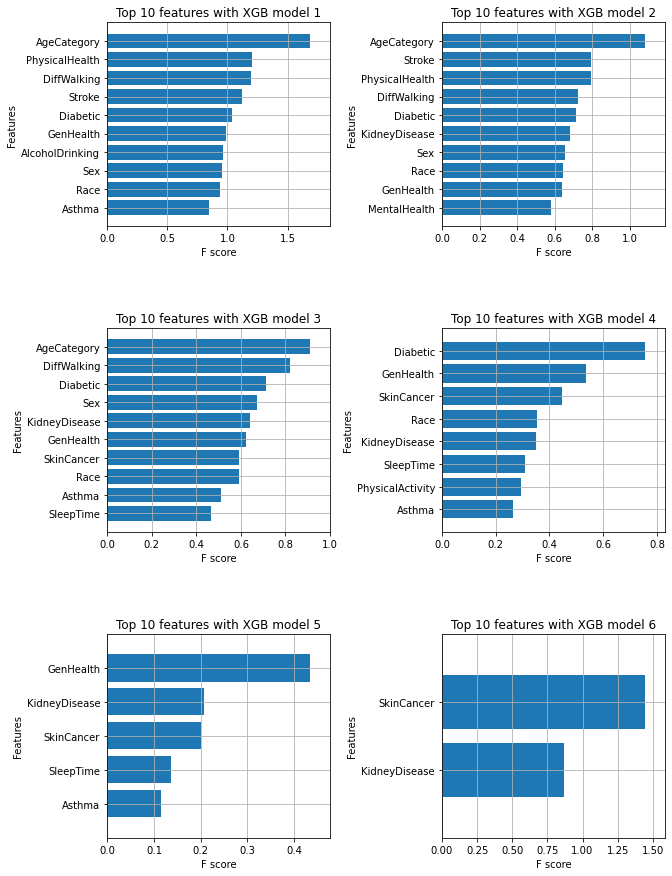

            Total time taken for XGBoost feature selection = 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 15 important features:
['AgeCategory', 'PhysicalHealth', 'DiffWalking', 'Stroke', 'Diabetic', 'GenHealth', 'AlcoholDrinking', 'Sex', 'Race', 'Asthma', 'KidneyDisease', 'MentalHealth', 'SkinCancer', 'SleepTime', 'PhysicalActivity']

    Time taken for feature selection = 2 seconds
Returning 2 dataframes: dataname and test_data with 15 important features.


In [29]:
# automatic feature selection by using featurewiz package
HeartDisease = 'HeartDisease'
 
features, train = featurewiz(dataset, HeartDisease, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [30]:
print(features)

['AgeCategory', 'PhysicalHealth', 'DiffWalking', 'Stroke', 'Diabetic', 'GenHealth', 'AlcoholDrinking', 'Sex', 'Race', 'Asthma', 'KidneyDisease', 'MentalHealth', 'SkinCancer', 'SleepTime', 'PhysicalActivity']


In [31]:
#split data into feature and HeartDisease
X_data_featurewiz = train.drop(['HeartDisease'],axis=1)
 
y_data_featurewiz = train.HeartDisease.values

### SelectKBest

In [32]:
# Create and fit selector
selector = SelectKBest(f_classif, k=7)
selector.fit(X_data, y_data)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_data = X_data.iloc[:,cols] 
X_data

,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
8814,0,0.0,0,9,0,1,0
237540,0,0.0,1,3,0,0,0
252205,0,0.0,0,10,0,1,0
208285,0,0.0,0,10,0,1,0
28397,0,5.0,0,10,0,1,1
...,...,...,...,...,...,...,...
117594,0,0.0,0,12,0,1,0
184353,0,5.0,1,8,2,1,1
113244,0,5.0,0,6,0,1,0
265408,0,0.0,0,3,0,1,0


## Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

## Standardization

### Standard Scaler

In [34]:
X_train_ss =  StandardScaler().fit_transform(X_train)
X_test_ss =  StandardScaler().fit_transform(X_test)

### MinMax Scaler

In [35]:
X_train_mm =  MinMaxScaler().fit_transform(X_train)
X_test_mm =  MinMaxScaler().fit_transform(X_test)

## Oversampling

In [36]:
sm = SMOTE(random_state=2)
X_train_os, y_train_os = sm.fit_resample(X_train_ss, y_train)

In [37]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_os == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_os == 0)))

Before OverSampling, counts of label '1': 229
Before OverSampling, counts of label '0': 2329
After OverSampling, counts of label '1': 2329
After OverSampling, counts of label '0': 2329


## Undersampling

# Logistic Regression

In [38]:
X_train_log = X_train_os
y_train_log = y_train_os
X_test_log = X_test_ss
y_test_log = y_test

In [39]:
model_log = LogisticRegression()

In [40]:
model_log.fit(X_train_log,y_train_log)

LogisticRegression()

In [41]:
model_log.score(X_train_log,y_train_log)

0.7413052812365822

In [42]:
model_log.score(X_test_log,y_test_log)

0.725

To get a better sense of what is going on inside the logistic regression model, we can visualize how our
model uses the different features and which features have greater effect. From the above figure, we can
know rest_ecg, vessels_colored_by_flourosopy, max_heart_rate have significant influence on the model.

In [43]:
log_y_pred = model_log.predict(X_test_log)

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test_log, log_y_pred)

In [45]:
accuracy_report(y_test_log, log_y_pred)

0.725
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       583
           1       0.22      0.82      0.35        57

    accuracy                           0.73       640
   macro avg       0.60      0.77      0.59       640
weighted avg       0.91      0.72      0.78       640

0.7699136348590171


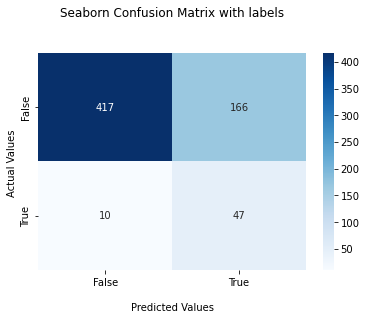

In [46]:
plot_confusion_matrix(y_test_log, log_y_pred)

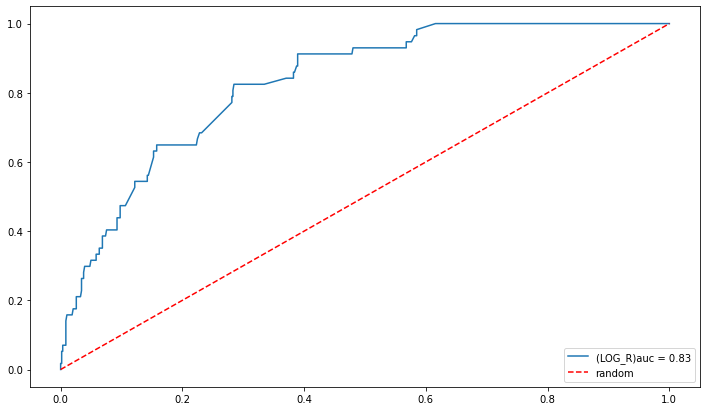

In [47]:
# ROC curve
log_y_pred_proba = model_log.predict_proba(X_test_log)[::,1]
log_fpr, log_tpr, _ = metrics.roc_curve(y_test_log, log_y_pred_proba)
log_auc = metrics.roc_auc_score(y_test_log, log_y_pred_proba)
plt.figure(figsize=(12, 7))
plt.plot(log_fpr, log_tpr, label="(LOG_R)auc = " + str(round(log_auc,2)))
plt.plot([0,1], [0,1], color = "red", linestyle = "--",
label = "random")
plt.legend(loc=4)
plt.show()

## Hyperparameter Tuning

In [48]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [49]:
clf = GridSearchCV(model_log, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [50]:
best_clf = clf.fit(X_train_log, y_train_log)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [51]:
best_clf.best_estimator_

LogisticRegression(C=0.004832930238571752, penalty='l1', solver='saga')

In [52]:
best_clf.fit( X_train_log, y_train_log) 
y_pred=best_clf.predict(X_test_log)
print(classification_report(y_test_log,y_pred))

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
              precision    recall  f1-score   support

           0       0.98      0.70      0.81       583
           1       0.21      0.82      0.34        57

    accuracy                           0.71       640
   macro avg       0.59      0.76      0.57       640
weighted avg       0.91      0.71      0.77       640



# KNN

In [ ]:
X_train_knn = X_train_os
y_train_knn = y_train_os
X_test_knn = X_test_ss
y_test_knn = y_test

In [ ]:
# search for an optimal value of K for KNN

# empty list to store scores
k_scores = []
for k in range(1,11):
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_data, y_data, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append((k,scores.mean()))
score_df = pd.DataFrame(k_scores, columns=['k','accuracy'])
score_df

In [ ]:
# Now try to train the model using training data, and evaluate the performance of the model on the testing data

#train k-NN model on X_train and y_train, predict it on y_train,y_test using knn.score
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 11));

we can see the best K is between 2 to 5, after 5 the accuracy is starting to decrease because of
underfitting. High values of k will make the underfitting.

Evaluation procedure 1 - Train and test on the entire dataset

In [ ]:
# Fit a K-nearest neighbors model with a value of k=3 to this data and predict the outcome on the same data.
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)

In [ ]:
# Function to calculate the % of values that were correctly predicted
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [ ]:
# print the accuracy
print(accuracy(y_data, y_pred))

In [ ]:
# Fit the K-nearest neighbors model again with n_neighbors=3 but this time use distancefor the weights.
# Calculate the accuracy using the function you created above.
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
print(accuracy(y_data, y_pred))

In [ ]:
# Fit another K-nearest neighbors model.
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
print(accuracy(y_data, y_pred))
# This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (p=1) i.e. Manhattan Distance.

Evaluation procedure 2 - Train/test split

In [ ]:
knn = knn.fit(X_train_knn, y_train_knn)
#check accuracy of our model on the test data
knn.score(X_test_knn, y_test_knn)

In [ ]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k
score_list = list()
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn)
    score = accuracy(y_test_knn, y_pred)
    score_list.append((k, score))
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df

In [ ]:
score_df.plot(x ='k', y='accuracy', kind = 'line')
plt.show()

In [ ]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k
score_list = list()
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn = knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn)
    score = accuracy(y_test_knn, y_pred)
    score_list.append((k, score))
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df

In [ ]:
score_df.plot(x ='k', y='accuracy', kind = 'line')
plt.show()

## Standard Scaler

In [ ]:
scaler = StandardScaler()
X_train_knn_std_scaler = scaler.fit_transform(X_train_knn)
X_test_knn_std_scaler = scaler.fit_transform(X_test_knn)

scaling of the data makes it easy for a model to learn and understand the problem

In [ ]:
X_train_knn_std_scaler_pd = pd.DataFrame(X_train_knn_std_scaler)
X_test_knn_std_scaler_pd = pd.DataFrame(X_test_knn_std_scaler)

In [ ]:
bias_KnnClass, var_KnnClass,error_KnnClass, = [], [], []
for k in range(1,41):
    clf_knn = KNeighborsClassifier(n_neighbors=k,p=1)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_knn, X_train_knn_std_scaler_pd.values, y_train_knn, X_test_knn_std_scaler_pd.values, y_test_knn, loss='0-1_loss', random_seed=123)
    bias_KnnClass.append(avg_bias)
    var_KnnClass.append(avg_var)
    error_KnnClass.append(avg_expected_loss)
plt.figure(figsize=(12, 6))
plt.plot(range(1,41), error_KnnClass, 'orange', label = 'total_error',linestyle='dashed')
plt.plot(range(1,41), bias_KnnClass, 'brown', label = 'bias^2')
plt.plot(range(1,41), var_KnnClass, 'black', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.ylabel('Error')
plt.legend()

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, p = 1)
    knn.fit(X_train_knn, y_train_knn)
    pred_i = knn.predict(X_test_knn)
    error.append(np.mean(pred_i != y_test_knn))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output, we can see that mean error is below 0.05 which is k=2,3

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_knn_std_scaler, y_train_knn)
y_pred = knn.predict(X_test_knn_std_scaler)
print(accuracy_score(y_test_knn, y_pred))
print(classification_report(y_test_knn, y_pred))
print(confusion_matrix(y_test_knn, y_pred))

## MinMax Scaler

In [ ]:
MinMaxScaler = MinMaxScaler()
X_train_knn_MM_scaler = MinMaxScaler.fit_transform(X_train_knn)
X_test_knn_MM_scaler = MinMaxScaler.fit_transform(X_test_knn)

## Hyperparameter Tuning

In [ ]:
k_range = list(range(1, 31))

In [ ]:
grid_params = { 'n_neighbors' : k_range,
'weights' : ['uniform','distance'],
'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our data set
g_res = gs.fit(X_train_knn, y_train_knn)

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train_knn, y_train_knn)
y_pred = knn.predict(X_test_knn)
print(accuracy_score(y_test_knn, y_pred))
print(classification_report(y_test_knn, y_pred))
print(confusion_matrix(y_test_knn, y_pred))

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors =9, weights = 'distance',metric= 'manhattan')
knn.fit(X_train_knn, y_train_knn)
y_pred = knn.predict(X_test_knn)

print(accuracy_score(y_test_knn,y_pred))
print(classification_report(y_test_knn,y_pred))
print(roc_auc_score(y_test_knn,y_pred))
clf = confusion_matrix(y_test_knn,y_pred)
ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


# Naive Bayes

In [57]:
X_train_nb = X_train_os
y_train_nb = y_train_os
X_test_nb = X_test_ss
y_test_nb = y_test

In [58]:
classifier = GaussianNB()
classifier.fit(X_train_nb, y_train_nb)
y_pred  =  classifier.predict(X_test_nb)
cm = confusion_matrix(y_test_nb, y_pred)
ac = accuracy_score(y_test_nb,y_pred)
ac

0.790625

In [59]:
#MultinomialNB testing
MNB = BernoulliNB()
MNB.fit(X_train_nb, y_train_nb)
y_pred_naive2 = MNB.predict(X_test_nb)
print(accuracy_score(y_test_nb, y_pred_naive2))
print(classification_report(y_test_nb, y_pred_naive2))
print(roc_auc_score(y_test_nb, y_pred_naive2))

0.7453125
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       583
           1       0.20      0.63      0.31        57

    accuracy                           0.75       640
   macro avg       0.58      0.69      0.58       640
weighted avg       0.89      0.75      0.80       640

0.6940055971833529


In [60]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_nb, y_train_nb)

#Predict the response for test dataset
y_pred = gnb.predict(X_test_nb)
print(accuracy_score(y_test_nb, y_pred))
print(classification_report(y_test_nb, y_pred))
print(roc_auc_score(y_test_nb, y_pred))

0.790625
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       583
           1       0.23      0.56      0.32        57

    accuracy                           0.79       640
   macro avg       0.59      0.69      0.60       640
weighted avg       0.89      0.79      0.83       640

0.6872197646775601


# Random Forest

In [64]:
X_train_rf = X_train_os
y_train_rf = y_train_os
X_test_rf = X_test_ss
y_test_rf = y_test

In [65]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train_rf, y_train_rf);

In [66]:
y_pred=rf.predict(X_test_rf)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60       583
           1       0.12      0.77      0.20        57

    accuracy                           0.47       640
   macro avg       0.53      0.60      0.40       640
weighted avg       0.88      0.47      0.56       640



## Hyperparameter Tuning

In [68]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

In [69]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [70]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [71]:
rf_random.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=1000,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [72]:
# get the hyperparameters with the best score
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [73]:
randmf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 120, bootstrap=True) 
randmf.fit( X_train_rf, y_train_rf) 

RandomForestClassifier(max_depth=120, max_features='auto')

In [74]:
y_pred=randmf.predict(X_test_rf)
print(classification_report(y_test_rf,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.44      0.60       583
           1       0.12      0.79      0.21        57

    accuracy                           0.47       640
   macro avg       0.54      0.61      0.41       640
weighted avg       0.88      0.47      0.57       640



# Decision Tree

In [87]:
X_train_dt = X_train_os
y_train_dt = y_train_os
X_test_dt = X_test_ss
y_test_dt = y_test

In [88]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train_dt,y_train_dt)
#Predict the response for train and test dataset
y_train_pred_dtWithoutOptimizing = clf.predict(X_train_dt)
y_test_pred_dtWithoutOptimizing = clf.predict(X_test_dt)

In [89]:
def plot_confusion_matrix(y_train,y_train_pred,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    s = sns.heatmap(cf,annot=True, yticklabels=['Not diabetes','Diabetes']
    ,xticklabels=['Not diabetes','Diabetes'],cmap='Blues', fmt='g')
    s.set(xlabel='Predicted', ylabel='Actual')
    plt.tight_layout()
    plt.show()

Train Confusion matrix


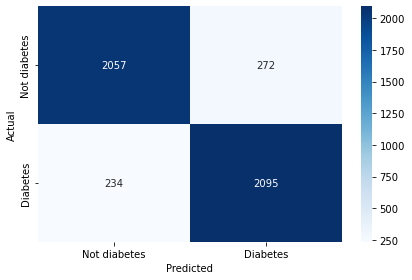

Accuracy:  0.8913696865607557
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2329
           1       0.89      0.90      0.89      2329

    accuracy                           0.89      4658
   macro avg       0.89      0.89      0.89      4658
weighted avg       0.89      0.89      0.89      4658

ROC AUC score: 0.8913696865607557


In [90]:
# Training Accuracy, how often the model classify the training data correctly?
plot_confusion_matrix(y_train_dt,y_train_pred_dtWithoutOptimizing,dom='Train')
print("Accuracy: ", accuracy_score(y_train_dt, y_train_pred_dtWithoutOptimizing))
print("Classification report: ")
print(classification_report(y_train_dt, y_train_pred_dtWithoutOptimizing))
print("ROC AUC score:", roc_auc_score(y_train_dt, y_train_pred_dtWithoutOptimizing))

Test Confusion matrix


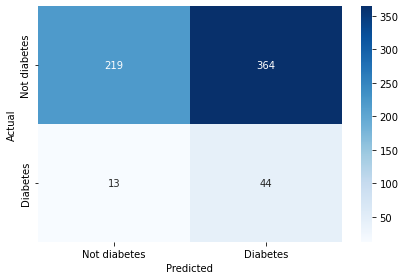

Accuracy:  0.4109375
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.38      0.54       583
           1       0.11      0.77      0.19        57

    accuracy                           0.41       640
   macro avg       0.53      0.57      0.36       640
weighted avg       0.87      0.41      0.51       640

ROC AUC score: 0.573786524630616


In [91]:
# Testing Accuracy, how often the model classify the testing data correctly?
plot_confusion_matrix(y_test_dt,y_test_pred_dtWithoutOptimizing,dom='Test')
print("Accuracy: ", accuracy_score(y_test_dt, y_test_pred_dtWithoutOptimizing))
print("Classification report: ")
print(classification_report(y_test_dt, y_test_pred_dtWithoutOptimizing ))
print("ROC AUC score:", roc_auc_score(y_test_dt, y_test_pred_dtWithoutOptimizing))

## Optimizing Decision Tree Performance

### Pre Pruning Techniques

In [92]:
params = {'criterion': ['gini', 'entropy'],
            'max_depth': [2,4,6,8,10,12],
            'min_samples_split': [2,3,4],
            'min_samples_leaf': [1,2]}
clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train_dt,y_train_dt)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [93]:
model = gcv.best_estimator_
model

DecisionTreeClassifier(max_depth=12, min_samples_split=3)

Train Confusion matrix


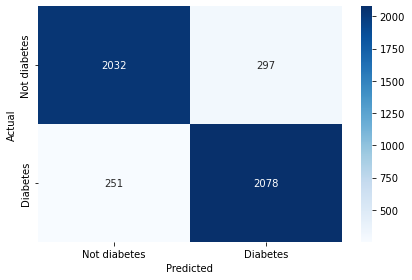

Accuracy:  0.8823529411764706
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2329
           1       0.87      0.89      0.88      2329

    accuracy                           0.88      4658
   macro avg       0.88      0.88      0.88      4658
weighted avg       0.88      0.88      0.88      4658

ROC AUC score: 0.8823529411764706


In [94]:
model.fit(X_train_dt,y_train_dt)
y_train_pred_dtWithPrePruning = model.predict(X_train_dt)
y_test_pred_dtWithPrePruning = model.predict(X_test_dt)
# Training Accuracy
plot_confusion_matrix(y_train_dt,y_train_pred_dtWithPrePruning,dom='Train')
print("Accuracy: ", accuracy_score(y_train_dt, y_train_pred_dtWithPrePruning))
print("Classification report: ")
print(classification_report(y_train_dt, y_train_pred_dtWithPrePruning))
print("ROC AUC score:", roc_auc_score(y_train_dt, y_train_pred_dtWithPrePruning))

Test Confusion matrix


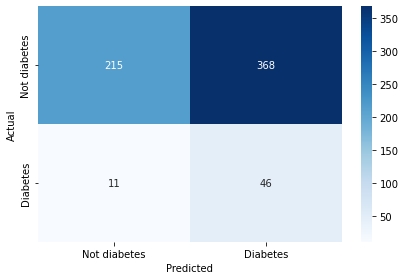

Accuracy:  0.4078125
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.37      0.53       583
           1       0.11      0.81      0.20        57

    accuracy                           0.41       640
   macro avg       0.53      0.59      0.36       640
weighted avg       0.88      0.41      0.50       640

ROC AUC score: 0.5878998525473202


In [95]:
# Testing Accuracy
plot_confusion_matrix(y_test_dt, y_test_pred_dtWithPrePruning,dom='Test')
print("Accuracy: ", accuracy_score(y_test_dt, y_test_pred_dtWithPrePruning))
print("Classification report: ")
print(classification_report(y_test_dt, y_test_pred_dtWithPrePruning))
print("ROC AUC score:", roc_auc_score(y_test_dt, y_test_pred_dtWithPrePruning))

# SVM

## With Standard Scaler

In [101]:
X_train_svm = X_train_os
y_train_svm = y_train_os
X_test_svm = X_test_ss
y_test_svm = y_test

In [102]:
# SVM Classifier model
svm_clf = SVC(probability=True)
svm_clf.fit(X_train_svm, y_train_svm)

SVC(probability=True)

In [103]:
y_train_pred_svm = svm_clf.predict(X_train_svm)
y_test_pred_svm = svm_clf.predict(X_test_svm)

Train Confusion matrix


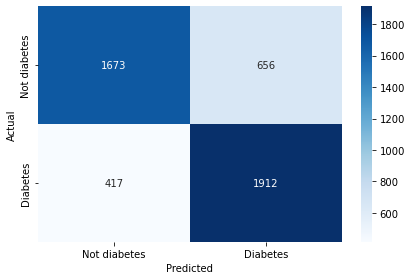

Accuracy:  0.7696436238729069
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      2329
           1       0.74      0.82      0.78      2329

    accuracy                           0.77      4658
   macro avg       0.77      0.77      0.77      4658
weighted avg       0.77      0.77      0.77      4658

ROC AUC score: 0.7696436238729069


In [104]:
# Training Accuracy
plot_confusion_matrix(y_train_svm, y_train_pred_svm,dom='Train')
print("Accuracy: ", accuracy_score(y_train_svm, y_train_pred_svm))
print("Classification report: ")
print(classification_report(y_train_svm, y_train_pred_svm))
print("ROC AUC score:", roc_auc_score(y_train_svm, y_train_pred_svm))

Test Confusion matrix


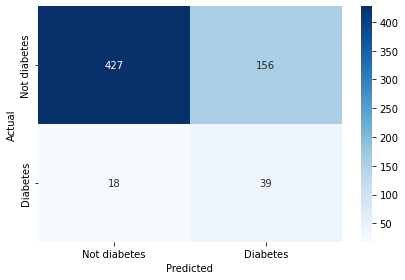

Accuracy:  0.728125
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       583
           1       0.20      0.68      0.31        57

    accuracy                           0.73       640
   macro avg       0.58      0.71      0.57       640
weighted avg       0.89      0.73      0.78       640

ROC AUC score: 0.7083145255935722


In [105]:
# Testing Accuracy
plot_confusion_matrix(y_test_svm, y_test_pred_svm,dom='Test')
print("Accuracy: ", accuracy_score(y_test_svm, y_test_pred_svm))
print("Classification report: ")
print(classification_report(y_test_svm, y_test_pred_svm))
print("ROC AUC score:", roc_auc_score(y_test_svm, y_test_pred_svm))

## test

In [106]:
model = SVC()
model.fit(X_train_svm, y_train_svm)
 
# print prediction results
predictions = model.predict(X_test_svm)
print(classification_report(y_test_svm, predictions))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       583
           1       0.20      0.68      0.31        57

    accuracy                           0.73       640
   macro avg       0.58      0.71      0.57       640
weighted avg       0.89      0.73      0.78       640



In [107]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_svm, y_train_svm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.753 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.753 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.752 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.752 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.789 total time=   3.9s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.830 total time=   5.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.834 total time=   6.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.809 total time=   5.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   2.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.784 total time=   2.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.806 total time=   3.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.812 total time=   2.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.809 total time=   3.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.735 total time=   1.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.762 total time=   1.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.766 total time=   2.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [108]:

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [109]:
grid_predictions = grid.predict(X_test_svm)
 
# print classification report
print(classification_report(y_test_svm, grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       583
           1       0.15      0.39      0.22        57

    accuracy                           0.75       640
   macro avg       0.54      0.59      0.54       640
weighted avg       0.86      0.75      0.80       640

